### **Table of Contents**

* What is going on mathematically. 
* What is going on with the code (Important, hw related). 
* What is the error? How are we going to see the error computationally. 
* Some extra cool stuff if we have time. 

## **Formulas For Finite Difference**

Finite Differentials: 

Everything started with the Taylor Series view of things: 

> $$
> \exist \; t \in (x, c) : f(x) = \left(
>     \sum_{k = 0}^{n} \frac{f^{(k)}(c)(x - c)^k}{k!}
> \right) + 
> \frac{f^{(n + 1)}(t)(x -c)^{n + 1}}{(n + 1)!}
> $$

Sometimes, the last term is written in integral form using Intermediate Value Theorem. 

We are assuming that the function is $C^{k}$ smooth, meaning that $f^{(k)}$ is a continuous function. 

Now, in lecture, we adhere to Taylor Series expanded at the point $x$, but approximating the value of $x + h$, which can be written as: 

> $$
> \begin{aligned}
>     f(x + h) &= f(x) + hf'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f^{(3)}(x) \cdots  +\frac{h^n}{n!}f^{(n)}(x) + \mathcal{O}(h^{(n + 1)})
> \end{aligned}
> $$

Now, the spirit of is to take the deriative on the function, using alue of the functions, **evaluated at equally spaced** points. And if they are not equally spaces, you might need to work with something like [Larange Polynomial](https://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html). 

---
### **Order 2 Finite Differences**
**Forward, Backward**: 

$\mathcal{O}(\Delta t^2)$ forward and backwards difference schemes for $f'(t)$ and $f''(t)$. 

$$
f'(t) = \frac{\pm 3f(t) \mp  4f(t\mp \Delta t) \pm f(t \mp 2\Delta t)}
{2\Delta t}
$$

$$
f''(t) = \frac{2f(t) - 5f(t \pm \Delta t) + 4f(t \pm 2\Delta t) - f(t \pm 3\Delta t)}
{\Delta t^2}
$$

Notice the some of the symmetry here allows us to exploit the super position operator $\pm$ and $\mp$. 

Or, you can use the Sympy (python module) to look for finite difference in a quick and dirty way.

**Central**: 
$$
\begin{array}{l}
f^{\prime}(t) &=&[f(t+\Delta t)-f(t-\Delta t)] / 2 \Delta t
	\\
f^{\prime \prime}(t)&=&[f(t+\Delta t)-2 f(t)+f(t-\Delta t)] / \Delta t^{2}
	\\
f^{\prime \prime \prime}(t)&=&[f(t+2 \Delta t)-2 f(t+\Delta t)+2 f(t-\Delta t)-f(t-2 \Delta t)] / 2 \Delta t^{3}
	\\
f^{\prime \prime \prime}(t)&=&[f(t+2 \Delta t)-4 f(t+\Delta t)+6 f(t)-4 f(t-\Delta t)+f(t-2 \Delta t)] / \Delta t^{4}
\end{array}
$$

---
### **Order 4th Finite Differences**

**Central Difference Scheme**

$$
\begin{aligned}
&f^{\prime}(t)=[-f(t+2 \Delta t)+8 f(t+\Delta t)-8 f(t-\Delta t)+f(t-2 \Delta t)] / 12 \Delta t \\
&f^{\prime \prime}(t)=[-f(t+2 \Delta t)+16 f(t+\Delta t)-30 f(t) \\
&\quad+16 f(t-\Delta t)-f(t-2 \Delta t)] / 12 \Delta t^{2}
\end{aligned}
$$

Reference: From page41 of the textbook.  

**Backwards and Forwards Diff**

I am not sure where it is, probably need to derive it some point I think. 




## **Integration Schemes**

This is known to most people I believe, and I will just restated the Riemann Sum here for ease of referencing: 

**Basic Quantities**

The grid points, the function outputs at each point: 

$$
\begin{aligned}
    x_0 &= x_0\\
    x_1 &= x_0 + h\\
    x_2 &= x_0 + 2h\\
    f_i &= f(x_i)
\end{aligned}
$$

---
**Trapzoid Rule**

$$
\int_{x_0}^{x_1} f(x)dx = \frac{h}{2}(f_0 + f_n) - \frac{h^3}{12}f''(c)
$$

In here, $h = x_1 - x_0$. And the function value between the point $x_0 and X_1$ is approximated using the avaerage of the function at $x_1$, $x_0$. $f_0 = f(x_0)$, $f_1 = f(x_1)$. 

Error scales like $h^2$, and we need 2 for each discretized intervals. 

**Now for this example**, let's consider having the pints $x_0, x_1, \cdots, x_n$ on the axis, then the intgral is basically: 

> $$ 
> \begin{aligned}
>     \int_{x_0}^{x_n}f(x) dx &= \sum_{i = 0}^{n - 1} \int_{x_i}^{x_{i + 1}} f(x)dx
>     \\
>     & = \left(
>     \sum_{i = 0 }^{n - 1} \frac{h}{2}(f_0 + f_n) \right) + \mathcal{O}(h^2)  
>     \\
>     & = \frac{h}{2}\left(f_0 + f_n + 2 \sum_{i = 1}^{n - 1}f_i\right) + \mathcal{O}(h^2)
> \end{aligned}
> $$

However, the more accuracy you want, the more points will be needed to approximates the value of the function at some given interval. 

---
**Simposon's Rule**

$$
\int_{x_0}^{x_2} 
    \frac{h}{3}(f_0 + 4f_1+ f_2)
dx + \mathcal{O}(h^5)
$$


This time, we are taking 3 points, which means that we need 2 intervals each time to take the integral. Same deal. 


> $$
> \begin{aligned}
>     \sum_{i = 0}^{n/2} \frac{h}{3}(f_{2i} + 4f_{2i + 1}+ f_{2i + 2})
> \end{aligned} + \mathcal{O}(n^4)
> $$

**Note**: You must use odd number of points, if not, we must need higher accuracy method to handle the extra 4 points to keep the accuracy of the method. 

**Note**: 

In some text book it's written as: 

$$
\int_{a}^{b} \frac{b - a}{6}\left(
    f_a + 4f\left(\frac{a + b}{2}\right) + f_b
\right)dx
$$

Which is the same if we consider that $b - a = 2h$, and use 3 points to represents the intervals $[a, b]$ for the integral. 


**Recursive Refinement**

This is a method recurssively sub-divides the domain to take the integral, and there is a very dynamic way of building up the integral recursively using the results from the previous stepsize. 

The method an also be made adaptive to error and the local behaviors of the function, called the [Adaptive quadrature](https://en.wikipedia.org/wiki/Adaptive_quadrature), which is implemented as the `integral` function in Matlab and scipy. 



### **Code with Grace(Start good Coding practices please)**

Observe that, the differential of the function is just the weighted sums of the adjacent point. 

This means that we can write a function for each of the method, and feed it the point we want to get the value of differential at that point.  

Observe again that, these method are just array opeartions on one array itself, involving sums and basic array manipulations. 

Exercise: 

Consider a function, `SecondOrderSecondDiff(i, arr)`, which takes in the index of the point, $x_i$, and return the differential (assuming h = 1, we can always scale it later.) from the `arr`. 

* `arr`: $[f(x_0), f(x_1), \cdots, f(x_n)]$
* `0 <= i <= len(arr)`

This is a graceful way to do it because it's separatinfg the action of taking the derivative for each points on the array, and the details of taking summing up all the function values at those points with the corresponding weights. 

<details>
<summary>
    Hints
</summary>

* Takes in the values
  
* Appliey the formula for points $x_{i}, x_{i - 1}, x_{i +_ 1}$, if they are not out of boundary of the array, and check different cases, applying the finite difference intelligently. 

* Return the results.
</details>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def SecondOrderSecondDiffAt(i, arr): 
    Summation = 0
    if i < 0 or i >= len(arr) : 
        raise Exception("Array index out of range, please check your code. ")
    if len(arr) < 4:
        raise Exception("Too small for Second Order Second Differetial on this array. ")
    elif i == 0: # Left boundary points 
        Weights = [2, -5, 4, -1]
        for IdexI in range(4):
            Summation += Weights[IdexI]*arr[IdexI]
        return Summation
    elif i == len(arr) - 1: # right Boundary Points 
        Weights = [2, -5, 4, -1]
        for IdexI in range(4):
            Summation += Weights[IdexI]*arr[IdexI - 4]
        return Summation
    else: 
        Weights = [1, -2, 1]
        Summation = Weights[0]*arr[i-1] + Weights[1]*arr[i] + Weights[2]*arr[i + 1]
        return Summation
    
    # Function should have terminated at this point. 


### **Take this for a Spin**

Ok, let's take this for a spin. 

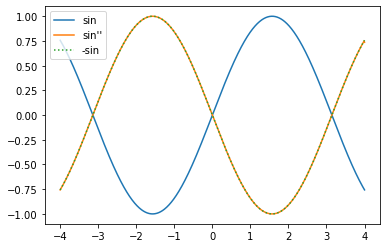

In [3]:
dx=0.01
x = np.arange(-4,4+dx,dx)
y = np.sin(x)  # function to differentiate
diff = np.zeros(len(y))
for IdexI in range(len(y)): 
    diff[IdexI] = SecondOrderSecondDiffAt(IdexI, y)/(dx**2)
plt.plot(x, y)
plt.plot(x, diff)
plt.plot(x, -np.sin(x), ':')
plt.legend(["sin", "sin''", "-sin"])

# Oh weight, we can write another function for this task of taking the differential on the whole array: 

def SecondOrderSecondDiffFor(y, h): 
    diff = np.zeros(len(y))
    for IdexI in range(len(y)): 
        diff[IdexI] = SecondOrderSecondDiffAt(IdexI, y)/(h**2)
    return diff



### **Experiementing with the Error**

Ok, what is the error of the 2n order scheme? Well... It's hard to tell without some statistics method with log log plot and linear regression, but I can compare it against with a first order method. 

**Exercise**: 
Suppose that the value of $h$ decreases geometrically by a factor of 2, and started with $2^{-4}$: $2^{-4}, 2^{-5}, 2^{-6}$ all the way to $\frac{1}{2^{19}}$, how does the error changes wrt to the step sizes we chose? Find out this experimentally. 

* To carry out the experiment, we plan to use $\sin(20*x)$ as an example, and take the second differential on it. 


Fact: The error is going to decrease and then increase again. It decreases because of increasing accuracy of the analytical error, it then increases again because of the floating point error. 

[4.695303713827373, 2.4460920157124115, 1.2404837780645406, 0.623673942154058, 0.31257769273097613, 0.1564592974431741, 0.07827041652867957, 0.03914516975883699, 0.019575045725075336, 0.009788135694895958, 0.004894192796439648, 0.002447211899226438, 0.0012258050080513469, 0.0007446665071121662, 0.0024527514623489967, 0.013801848862775582]


Text(0, 0.5, 'Log of the error norm')

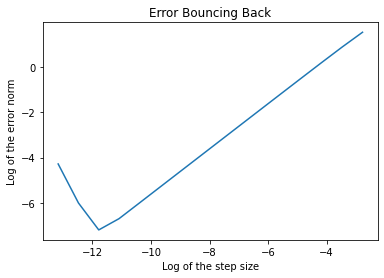

In [4]:
h = 2**(-4)
StepSizes = []
Errors = []  # Python native array. 

for I in range(16): 
    x = np.arange(0,1 + h,h)  # Only on the interval from [0, 1]
    y = np.sin(3*x)  # function to differentiate
    dy2dx2 = SecondOrderSecondDiffFor(y, h) 
    Errors.append(np.linalg.norm(dy2dx2 + 9*np.sin(3*x)))
    StepSizes.append(h)
    h /= 2

print(Errors)
plt.plot(
        np.log(np.array(StepSizes)),
        np.log(Errors)
    )
plt.title("Error Bouncing Back")
plt.xlabel("Log of the step size")
plt.ylabel("Log of the error norm")

### **Integrations(Homework Related)**

Taking the Integral is easy, we just need to sum things up that is all. 

There are 2 ways to do it depending on what we try to do: 

* Sum up using the integral formula while keeping the running sum and return the array representing the integral as the result. We are interested in the running sum of the function. (**This is done in class**)
* Only a scalar as the results, which is the value of the finite integral. 

Let's take a look at the trapz method and see what we can do: 

$$
\int_{x_0}^{x_n}f(x) dx \approx \frac{h}{2}\left(f_0 + f_n + 2 \sum_{i = 1}^{n - 1}f_i\right) 
$$

Suppose that array `arr` represetns $[f_0, f_1, \cdots, f_n]$, then certainly `arr[:-1]` is the array with every element excluding the last one, while `arr[1:]` is the array with every element excluding the first one. How would you make use of this to write the integral in one line without using any forloop? Hopefully using `np.sum`, or `sum` in matlab. 


<details>
<summary>hints</summary>

* Slice out the array that excludes the first and the last element, sum it up and then multiply it by 2, then we have the summation taken care of. 
* Add the end points $f_0, f_n$ to the sum. No forloop is needed. 

</details>


In [5]:
# Impelement this function on one line without using a forloop. 
def TrapzoidalRule(arr, h):
    return (h/2)*(2*np.sum(arr[1:-1]) + arr[0] + arr[-1])

def TrapzoidalIntegral(fxn:callable, a, b, h): 
    Grids = np.arange(a, b + h, h) 
    Ys = fxn(Grids)
    return TrapzoidalRule(Ys, h)





### **Computing the Probability**

Let's use the trapzoidal rule we wrote to compute the probability of getting a random variable from the Standard normal distribution that lies within the `[-sigma, sigma]` interval. 



0.6826894917338232


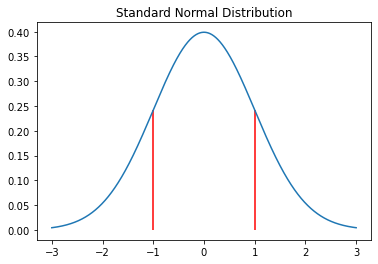

In [6]:
# Let's use this to figure out the integral of the normal distribution: 
mu = 0 
sigma = 1
def phi(x):
    # Accepts a vector and return a vector of all the output values of the system:     
    Result = (x - mu)/sigma
    Result = -(Result**2)/2
    Result = np.exp(Result)
    Result /= sigma*np.sqrt(2*np.pi)
    return Result

x = np.arange(-3*sigma, 3*sigma, 1e-4)
y = phi(x)
plt.plot(x, y)
plt.vlines(-sigma, ymin=0, ymax=phi(sigma), colors="red")
plt.vlines(sigma, ymin=0, ymax=phi(sigma), colors="red")
plt.title("Standard Normal Distribution")
print(TrapzoidalIntegral(phi, -sigma, sigma, 1e-4))